In [1]:
import pymysql
import pandas as pd
from  nltk.corpus import stopwords
from collections import Counter
import re

In [3]:
con = pymysql.connect(host='127.0.0.1',user='root',charset='utf8',db='abc',passwd='1234')
sql = "SELECT text FROM tweets"
df = pd.read_sql(sql,con)
print(df)

                                                   text
0     Unable to obtain any masks amid the #coronavir...
1     #Virus dents #bookings for #IHG; #Japan may lo...
2     #day14 unpack and pack again. No more unpack u...
3     @MtRdefender @rthk_enews What if one of them i...
4     @TwitterMoments Uyghur Muslims, Tibetans, Chri...
...                                                 ...
6172  The Keshe Foundation is trying to help many wi...
6173  Development of vaccine against new #coronaviru...
6174  Breaking News: Multiple US troop casualties af...
6175  Tim Pool: “I’m beginning to think we got a ser...
6176  RT @CoronavirusUpd3: 2/8 #coronavirus \n\nEpoc...

[6177 rows x 1 columns]


In [4]:
words = stopwords.words('english')
for w in ['!',',','.','?','-','&amp','I','The','RT','A','#Cov','This','&amp;','like','Hong','We','one','Kong','#covid19','#COVID19','#nCov',
         'could','get','https','#2019nCoV','know','|','In','dougles ','\nCCP','CCP','day','??']:
    words.append(w)

In [5]:
def remove_urls (vTEXT):
    vTEXT = re.sub(r'https:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [6]:
#Compute word frequency

text_2 = []
sentiment_towards_government = []

for context in df['text']:
    context_1 = remove_urls(context)
    text_1 = context_1.split()
    for word in text_1:
        if word not in words:
            text_2.append(word)
        if word == 'government':
            sentiment_towards_government.append(context_1)
                    
# print(text_2)

c = Counter(text_2)
print(c.most_common()[:40])

[('#coronavirus', 3746), ('#Coronavirus', 1027), ('China', 497), ('cases', 455), ('#CoronavirusOutbreak', 423), ('#China', 405), ('people', 391), ('new', 353), ('Chinese', 316), ('outbreak', 299), ('coronavirus', 264), ('Coronavirus', 239), ('virus', 235), ('#CoronaVirus', 230), ('#Wuhan', 226), ('via', 226), ('confirmed', 221), ('#Singapore', 177), ('#coronaviruswuhan', 175), ('Singapore', 173), ('#coronavirus.', 170), ('spread', 166), ('Wuhan', 162), ('#virus', 145), ('infected', 145), ('#coronavirus,', 139), ('global', 139), ('death', 138), ('need', 137), ('due', 137), ('#wuhanflu', 134), ('#coronaoutbreak', 132), ('health', 129), ('How', 129), ('#ad', 129), ('US', 128), ('#HongKong', 126), ('quarantine', 125), ('going', 124), ('#china', 124)]


In [7]:
# sample for sentiment using textblob
# polarity是情感极性，-1代表完全负面，1代表完全正面。subjectivity代表主观性

from textblob import TextBlob

output = []
text_3 = []
text_4 = []

for context in df['text']:
    blob = TextBlob(context)
    output.append(blob.sentiment)
    if blob.sentiment.polarity>0.4:
        text_3.append(context)
    if blob.sentiment.polarity<-0.4:    
        text_4.append(context)   

print(output[:10])

[Sentiment(polarity=-0.25, subjectivity=0.25), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.25, subjectivity=0.5), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.0, subjectivity=0.175), Sentiment(polarity=0.2, subjectivity=0.525), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.6, subjectivity=1.0), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.25, subjectivity=0.9)]


In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

(array([  29.,   37.,  161.,  283.,  718., 3642.,  808.,  384.,   57.,
          58.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

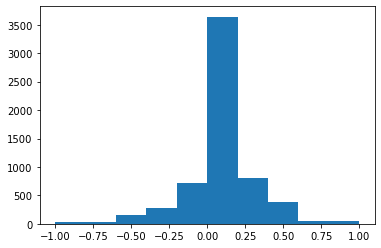

In [9]:
# make a histogram to show sentiment
polarity_list = []
for i in output:
    polarity_list.append(i.polarity)
plt.hist(polarity_list)

Word Cloud

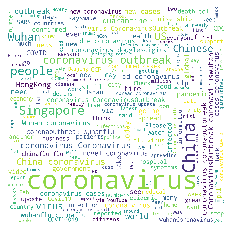

In [11]:
from wordcloud import WordCloud

str = ' '
str.join(text_2)
wordcloud = WordCloud(background_color="white",width=2000, height=2000, margin=2,normalize_plurals=False).generate(str.join(text_2))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('test.png')

In [19]:
# for sentiment score>0.4, we think the sentiments are positive,then we give some words example
text_good = []
for context in text_3:
    context_2 = remove_urls(context)
    text_5 = context_2.split()
    for word in text_5:
        if word not in words:
            text_good.append(word)

print(text_3[:5])
c_1 = Counter(text_good)
print(c_1.most_common()[:40])

['??This #coronavirus-inspired #parody of #Torn has gone #viral! Go check out this amazing #HKer Kathy Mak!!??\n\n“How do I use the #lift??”\n“How do I get the #door??”\n\n? https://t.co/MrJsE2i5A9\n\n#WeAreHKers #我地係香港人 #COVID19 #HongKong #Hongkonger #virus #song #lyrics https://t.co/bOynxkhfDr', "When you're happy you're no longer quarantined, and you know it, dance. #coronavirus https://t.co/VPgo9FG4Nv", 'Proud ?of the team of our Consulate-General here in #guangzhou for having been ranked the 3rd most #sustainable office of all #Dutch diplomatic missions worldwide. Good news in times of #coronavirus ! @MinBZ @DutchMFA https://t.co/RKR7OieOEH', 'RTHK more toxic than #coronavirus: #HongKongPolice supporters https://t.co/jujJZnP4o0', 'China coronavirus outbreak: All the latest updates | China News https://t.co/grwGuoYxA7 #coronavirus']
[('#coronavirus', 296), ('#Coronavirus', 90), ('China', 44), ('cases', 42), ('#China', 39), ('#CoronavirusOutbreak', 35), ('good', 34), ('latest', 31),

In [20]:
# for sentiment score<-0.4, we think the sentiments are positive,then we give some words example

text_bad = []
for context in text_4:
    context_3 = remove_urls(context)
    text_6 = context_3.split()
    for word in text_6:
        if word not in words:
            text_bad.append(word)

print(text_4[:5])
c_2 = Counter(text_bad)
print(c_2.most_common()[:40])

['@studioincendo Lest we forget. And everyone please do take care during Wuhan #coronavirus outbreak &amp; cold weather...', 'This is fake news.... \n#Coronavirustruth #COVID19 #coronavirus #FakeNewsAlert\n#FakeNews #Wuhan\n\nhttps://t.co/6rmmkLGTw8 https://t.co/Z6aXELe0IL', 'WTF is this! How come the #censorship is helping to contain the #coronavirus? At least @agnesbuzyn didn’t praise #China for their totalitarian regime. #FrenchGov https://t.co/Gjs1uq0WSf', 'As #Wuhan’s desperate &amp; sick beg for help, #China shuts them down. \n"Even now, when the #WuhanCoronavirus has taken &gt; 1,700 lives, the government is still trying to hide information" #coronavirus #coronaviruschina #WuhanCoronavirusOutbreak #WuhanPneumonia https://t.co/X0wifRlWvy', 'If this isn’t proof of completely irrational and insane behavior then what is? #coronavirus  https://t.co/TnFak6TnCs']
[('#coronavirus', 128), ('#Coronavirus', 27), ('#China', 15), ('China', 14), ('people', 13), ('coronavirus', 12), ('#Coronav

In [22]:
#compute sentiment towards government
government_output = []

for context in sentiment_towards_government:
    blob = TextBlob(context)
    government_output.append(blob.sentiment) 

print(government_output[:10])

[Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.125, subjectivity=0.375), Sentiment(polarity=-0.48994708994708996, subjectivity=0.7153439153439153), Sentiment(polarity=0.16666666666666666, subjectivity=0.19999999999999998), Sentiment(polarity=0.20185185185185184, subjectivity=0.44814814814814813), Sentiment(polarity=0.1, subjectivity=0.4), Sentiment(polarity=-0.05, subjectivity=0.2), Sentiment(polarity=0.10000000000000002, subjectivity=0.3833333333333333), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.26785714285714285, subjectivity=0.48928571428571427)]


(array([ 1.,  0.,  0.,  3.,  4., 13., 56., 30., 10.,  3.]),
 array([-1.        , -0.84333333, -0.68666667, -0.53      , -0.37333333,
        -0.21666667, -0.06      ,  0.09666667,  0.25333333,  0.41      ,
         0.56666667]),
 <a list of 10 Patch objects>)

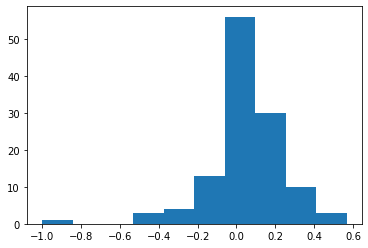

In [23]:
polarity_list_government = []
for i in government_output:
    polarity_list_government.append(i.polarity)
plt.hist(polarity_list_government)